# Train Test Splitting Distributions

Notebook to show the effect of performing a train test split.

In [1]:
# Import libraries
import pandas as pd 
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_palette("deep")
%matplotlib inline

# Import data
bikes_filepath = '../data/bikes.csv'
bikes_imported_data = pd.read_csv(filepath_or_buffer=bikes_filepath, delimiter=",")

# Clean missing data
bikes_clean_data = bikes_imported_data.interpolate(method='linear')
bikes_clean_data = bikes_clean_data.fillna(method="bfill")

# Set our target variable as the count
y = bikes_clean_data["count"].to_numpy()

# Create scaler object
rb_scaler = RobustScaler()

# We are just going to use real_temperature
numerical_data = bikes_clean_data[["real_temperature"]]
#numerical_data = numerical_data.drop(columns=["count", "feel_temperature"])

# Scale the data.
scaled_features = rb_scaler.fit_transform(numerical_data)
scaled_data = pd.DataFrame(scaled_features, columns=numerical_data.columns)

scaled_data.shape

(730, 1)

In [2]:
# only looking at one variable
X = scaled_data

In [11]:
from sklearn.model_selection import train_test_split

# Change this values to impact output visualisation
test_proportion = 0.5

train_X, test_X, train_y, test_y = train_test_split(X, 
                                                    y, 
                                                    test_size=test_proportion, 
                                                    random_state=None)

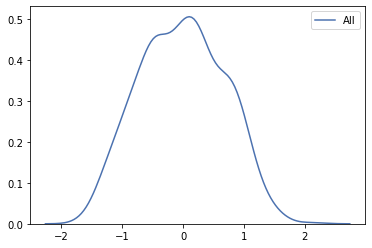

In [12]:
# Original data
ax = sns.distplot(X, hist=False, rug=False, label="All");


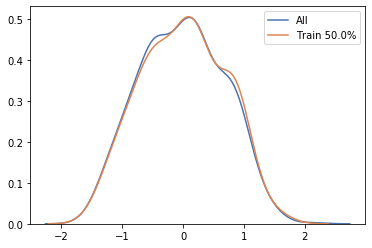

In [13]:
# Original data and training distribution
ax = sns.distplot(X, hist=False, rug=False, label="All");
sns.distplot(train_X, hist=False, rug=False, ax=ax, label="Train {}%".format((1-test_proportion)*100));


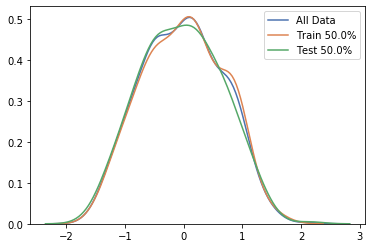

In [14]:
# Original data, training and test distribution
ax = sns.distplot(X, hist=False, rug=False, label="All Data");
sns.distplot(train_X, hist=False, rug=False, ax=ax, label="Train {}%".format((1-test_proportion)*100));
sns.distplot(test_X, hist=False, rug=False, ax=ax, label="Test {}%".format((test_proportion)*100));


In [15]:
from scipy.stats import ks_2samp
# Performing a Kolmogorov–Smirnov test to check if data is drawn from same distribution
print("KS statistic between train and test data: {}".format(ks_2samp(train_X, train_y)[0]))
print("KS p-value between train and test data: {}".format(ks_2samp(train_X, train_y)[1]))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)